In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
import math

# C1-FFL

In [2]:
def hillfuncact(X,K,n): # Hill function for activator
    return (X**n)/((K**n)+(X**n))

def hillfunrep(X,K,n): # Hill function for repressor
    #return 1/((X/K)**n)
    return 1-hillfuncact(X,K,n)

def reghilly(Y,t,X,B,a,K,n):
    return B*hillfuncact(X,K,n)-(a*Y)

def reghillz(Z,t,X,Y,B,a,K1,K2,n): # when Y is activator
    return B*hillfuncact(X,K1,n)*hillfuncact(Y,K2,n)-(a*Z)

def regstep(X,t,B,a,D):
    if (t>D[0] and t<D[1]) or (t>D[2] and t<D[3]):
        dxdt = B - (a*X)
    else:
        dxdt = -(a*X)
    return dxdt

In [3]:
Bx = 1
ax = 1
By = 1
ay = 1
Bz = 1
az = 1
Kyz = 0.75
Kxy = 0.5
n = 20
D = [2,15,30,31.5]

In [4]:
def rate_XY(u,t,ax,ay,az,Bx,By,Bz,Kxy,Kyz,n,D):
    x,y,z = u
    dxdt = regstep(x,t,Bx,ax,D)
    if (t>D[0] and t<D[1]) or (t>D[2] and t<D[3]):
        x = x
    else:
        x = 0
    dydt = reghilly(y,t,x,By,ay,Kxy,n)
    dzdt = reghillz(z,t,x,y,Bz,az,Kxy,Kyz,n)
    return [dxdt,dydt,dzdt]

In [5]:
t = np.linspace(0,50,100)
U1 = odeint(rate_XY,[0,0,0],t,args=(ax,ay,az,Bx,By,Bz,Kxy,Kyz,n,D))

In [6]:
s = ((t>D[0])&(t<D[1])) | ((t>D[2])&(t<D[3])).astype(int) # time pulse

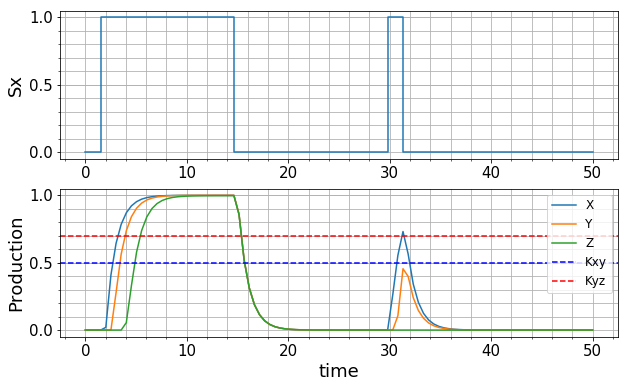

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False,figsize=(10, 6))
ax1.step(t,s)
ax1.grid(which='both')
ax1.minorticks_on()
ax1.set_ylabel('Sx', fontsize=18)
ax1.tick_params(labelsize=15)
ax2.grid(which='both')
ax2.minorticks_on()
ax2.set_xlabel('time', fontsize=18)
ax2.set_ylabel('Production', fontsize=18)
ax2.tick_params(labelsize=15)
ax2.plot(t,U1[:,0],label='X')
ax2.plot(t,U1[:,1],label='Y')
ax2.plot(t,U1[:,2],label='Z')
ax2.axhline(y=0.5, linestyle='--',color='blue',label='Kxy')
ax2.axhline(y=0.7, linestyle='--',color='red',label='Kyz')
ax2.legend(loc='best',fontsize=12)

# I1-FFL

In [8]:
def regstepx(X,t,B,a,D):
    if t<D:
        dxdt = B - (a*X)
    else:
        dxdt = -(a*X)
    return dxdt

def regstepy(Y,t,X,B,a,D):
    if t<D:
        dydt = B - (a*Y)
    else:
        dydt = -(a*Y)
    return dydt

def regstepz(Z,t,X,Y,B,B_,a,Trep,D):
    if t<Trep:
        dzdt = B - (a*Z)
    elif (t>Trep) and (t<D):
        dzdt = B_ - (a*Z)
    else:
        dzdt = -(a*Z)
    return dzdt

In [9]:
Bx = 1
ax = 1
By = 1
ay = 1
Bz = 1
Bz_ = 0.5 # B'
az = 1
Kyz = 0.75
Kxy = 0.5
n = 20
Yst = By/ay
Xst = Bx/ax
Zm = Bz/az
Zst = Bz_/az
Trep = (1/ay)*math.log(1/(1-(Kyz/Yst)))
D = 20#[2,15,30,31.5]

In [10]:
def rate_XY_2(u,t,ax,ay,az,Bx,By,Bz,Bz_,Trep,D):
    x,y,z = u
    dxdt = regstepx(x,t,Bx,ax,D)
    dydt = regstepy(y,t,x,By,ay,D)
    dzdt = regstepz(z,t,x,y,Bz,Bz_,az,Trep,D)
    return [dxdt,dydt,dzdt] #

In [11]:
t = np.linspace(0,50,100)
U2 = odeint(rate_XY_2,[0,0,0],t,args=(ax,ay,az,Bx,By,Bz,Bz_,Trep,D))

In [12]:
s= (t>0)&(t<D).astype(int)

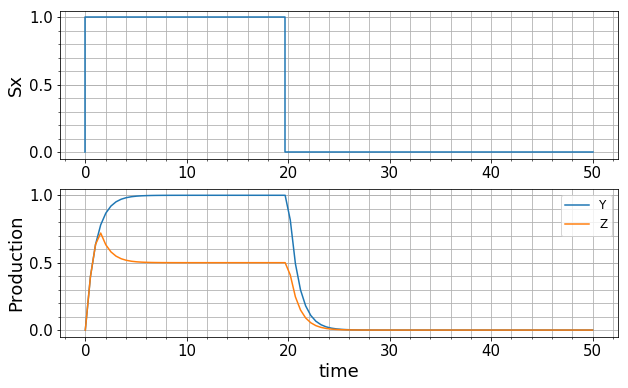

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False,figsize=(10, 6))
ax1.step(t,s)
ax1.grid(which='both')
ax1.minorticks_on()
ax1.set_ylabel('Sx', fontsize=18)
ax1.tick_params(labelsize=15)
ax2.grid(which='both')
ax2.minorticks_on()
ax2.set_xlabel('time', fontsize=18)
ax2.set_ylabel('Production', fontsize=18)
ax2.tick_params(labelsize=15)
#ax2.plot(t,U2[:,0],label='X')
ax2.plot(t,U2[:,1],label='Y')
ax2.plot(t,U2[:,2],label='Z')
#ax2.axhline(y=0.5, linestyle='--',color='blue',label='Kxy')
#ax2.axhline(y=0.7, linestyle='--',color='red',label='Kyz')
ax2.legend(loc='best',fontsize=12)